In [1]:
import random
from protocols import aloha, slotted_aloha, csma, csma_cd

In [2]:
class Setting():
    def __init__(self, host_num=3, total_time=10000, packet_num=500, packet_size=5, max_colision_wait_time=20, p_resend=0.3, link_delay=1, seed=None) -> None:
        self.host_num = host_num # host 數量
        self.total_time = total_time # 模擬時間總長，時間以1為最小時間單位
        self.packet_num = packet_num # 每個 host 生成的封包數量
        # packet time是完成一個封包所需的時間，包含了送packet的link delay和ack的link delay
        # 假設等待ack的時間等同於link delay
        self.packet_time = packet_size + 2*link_delay # 每個封包完成所需要的時間，等同於slotted aloha的slote size
        self.max_colision_wait_time = max_colision_wait_time # ALOHA, CSMA, CSMA/cD 重新發送封包的最大等待時間
        self.p_resend = p_resend # slotted aloha 每個slot開始時，重送封包的機率
        self.link_delay = link_delay # link delay
        self.packet_size = packet_size
        if seed is None:
            self.seed = random.randint(1, 10000)
        else:
            self.seed = seed # seed 用於 random，同樣的 seed 會有相同的結果

    # hosts產生封包的時間
    # e.g.
    #   [[10, 20, 30], # host 0
    #    [20, 30, 50], # host 1
    #    [30, 50, 60]] # host 2
    def gen_packets(self):
        random.seed(self.seed)
        packets = [[] for i in range(self.host_num)]
        for i in range(self.host_num):
            packets[i] = random.sample(range(1, self.total_time-self.packet_size), self.packet_num)
            packets[i].sort()
        return packets

## Code Test

In [3]:
test_setting = Setting(host_num=3, total_time=100, packet_num=4, max_colision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=109550206)

print('aloha')
x = aloha(setting=test_setting, show_history=True)
print('success_rate: {}'.format(x[0]))
print('idle_rate: {}'.format(x[1]))
print('collision_rate: {}'.format(x[2]))

print('slotted_aloha')
x = slotted_aloha(setting=test_setting, show_history=True)
print('success_rate: {}'.format(x[0]))
print('idle_rate: {}'.format(x[1]))
print('collision_rate: {}'.format(x[2]))

print('csma')
x = csma(setting=test_setting, show_history=True)
print('success_rate: {}'.format(x[0]))
print('idle_rate: {}'.format(x[1]))
print('collision_rate: {}'.format(x[2]))

print('csma_cd')
x = csma_cd(setting=test_setting, show_history=True)
print('success_rate: {}'.format(x[0]))
print('idle_rate: {}'.format(x[1]))
print('collision_rate: {}'.format(x[2]))

aloha
            V            V                                                               V      V       
h0: ........<---|.....<---|..........<---|............<---|......<---|........<---|...................<-
          V              V   V                             V                                            
h1: ......<---|...........<---|.....<---|.........<---|...................<---|.............<---|...<---
      VV                        V     V                                                                 
h2: ..<---|....<---|....<---|.........<---|...........<---|.........<---|...................<---|.......
success_rate: 0.0
idle_rate: 0.35
collision_rate: 0.65
slotted_aloha
            V            V                                                               V      V       
h0: ..........<---|<---|.........................<---|...................................<---|<---><---|
          V              V   V                             V                         

## Questions

In [4]:
import matplotlib.pyplot as plt

In [5]:
class Test():
    def __init__(self):
        self.aloha_success = list()
        self.aloha_idle = list()
        self.aloha_collision = list()
        self.slotted_aloha_success = list()
        self.slotted_aloha_idle = list()
        self.slotted_aloha_collision = list()
        self.csma_success = list()
        self.csma_idle = list()
        self.csma_collision = list()
        self.csma_cd_success = list()
        self.csma_cd_idle = list()
        self.csma_cd_collision = list()
        
    def test(self, settings):
        for per_setting in settings:
            # aloha
            x = aloha(setting=per_setting)
            self.aloha_success.append(x[0])
            self.aloha_idle.append(x[1])
            self.aloha_collision.append(x[2])
            # slotted_aloha
            x = slotted_aloha(setting=per_setting)
            self.slotted_aloha_success.append(x[0])
            self.slotted_aloha_idle.append(x[1])
            self.slotted_aloha_collision.append(x[2])
            # csma
            x = csma(setting=per_setting)
            self.csma_success.append(x[0])
            self.csma_idle.append(x[1])
            self.csma_collision.append(x[2])
            # csma_cd
            x = csma_cd(setting=per_setting)
            self.csma_cd_success.append(x[0])
            self.csma_cd_idle.append(x[1])
            self.csma_cd_collision.append(x[2])
            
    def plot_success(self, title, xlabel, x, tx, Q8):
        if not Q8:
            plt.plot(x, self.aloha_success, color='black', linestyle="-", linewidth="1", markersize="6", marker="x")
            plt.plot(x, self.slotted_aloha_success, color='red', linestyle="-", linewidth="1", markersize="6", marker="s")
        plt.plot(x, self.csma_success, color='green', linestyle="-", linewidth="1", markersize="6", marker="*")
        plt.plot(x, self.csma_cd_success, color='blue', linestyle="-", linewidth="1", markersize="6", marker="o")
        if not Q8:
            plt.legend(["aloha", "slotted_aloha", "csma", "csma_cd"])
        else:
            plt.legend(["csma", "csma_cd"])
        plt.xticks(tx)
        plt.xlabel(xlabel)
        plt.ylabel("Success Rate")
        plt.title(title)
        plt.show()
    
    def plot_idle(self, title, xlabel, x, tx, Q8):
        if not Q8:
            plt.plot(x, self.aloha_idle, color='black', linestyle="-", linewidth="1", markersize="6", marker="x")
            plt.plot(x, self.slotted_aloha_idle, color='red', linestyle="-", linewidth="1", markersize="6", marker="s")
        plt.plot(x, self.csma_idle, color='green', linestyle="-", linewidth="1", markersize="6", marker="*")
        plt.plot(x, self.csma_cd_idle, color='blue', linestyle="-", linewidth="1", markersize="6", marker="o")
        if not Q8:
            plt.legend(["aloha", "slotted_aloha", "csma", "csma_cd"])
        else:
            plt.legend(["csma", "csma_cd"])
        plt.xticks(tx)
        plt.xlabel(xlabel)
        plt.ylabel("Idle Rate")
        plt.title(title)
        plt.show()
    
    def plot_collision(self, title, xlabel, x, tx, Q8):
        if not Q8:
            plt.plot(x, self.aloha_collision, color='black', linestyle="-", linewidth="1", markersize="6", marker="x")
            plt.plot(x, self.slotted_aloha_collision, color='red', linestyle="-", linewidth="1", markersize="6", marker="s")
        plt.plot(x, self.csma_collision, color='green', linestyle="-", linewidth="1", markersize="6", marker="*")
        plt.plot(x, self.csma_cd_collision, color='blue', linestyle="-", linewidth="1", markersize="6", marker="o")
        if not Q8:
            plt.legend(["aloha", "slotted_aloha", "csma", "csma_cd"])
        else:
            plt.legend(["csma", "csma_cd"])
        plt.xticks(tx)
        plt.xlabel(xlabel)
        plt.ylabel("Collision Rate")
        plt.title(title)
        plt.show()
        
    def plot(self, title, xlabel, x, tx=None, Q8=False):
        if tx == None:
            self.plot_success(title, xlabel, x, x, Q8)
            self.plot_idle(title, xlabel, x, x, Q8)
            self.plot_collision(title, xlabel, x, x, Q8)
        else:
            self.plot_success(title, xlabel, x, tx, Q8)
            self.plot_idle(title, xlabel, x, tx, Q8)
            self.plot_collision(title, xlabel, x, tx, Q8)

### 1.

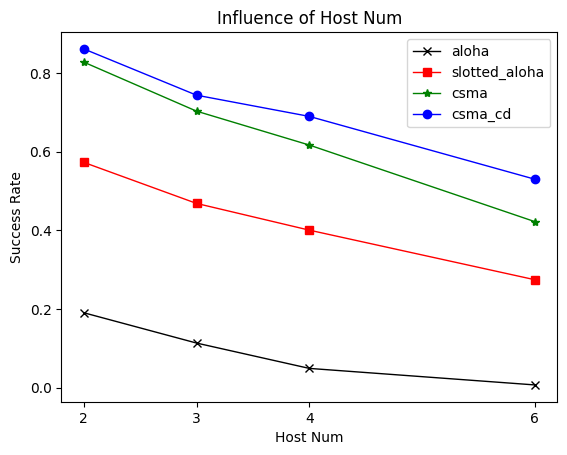

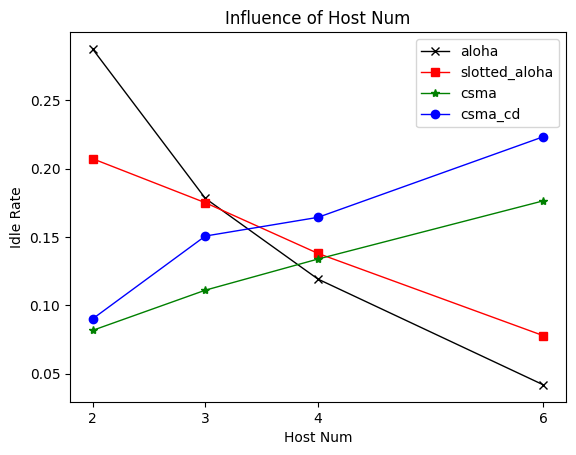

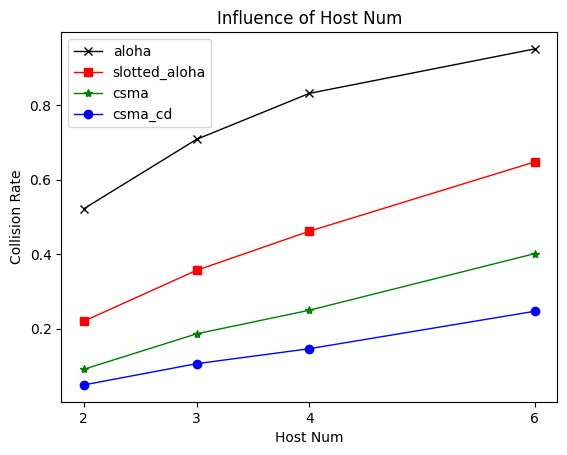

In [6]:
host_num_list = [2,3,4,6]
packet_num_list = [1200,800,600,400]
Q1_settings = [Setting(host_num=h, packet_num=p, max_colision_wait_time=20, p_resend=0.3) for h,p in zip(host_num_list, packet_num_list)]
Q1 = Test()
Q1.test(Q1_settings)
Q1.plot("Influence of Host Num", "Host Num", host_num_list)

### 2.

In [7]:
class Q2_Setting():
    def __init__(self, host_num=3, total_time=10000, packet_num=500, packet_size=5, max_colision_wait_time=None, p_resend=None, coefficient=8, link_delay=1, seed=None):
        self.host_num = host_num # host 數量
        self.total_time = total_time # 模擬時間總長，時間以1為最小時間單位
        self.packet_num = packet_num # 每個 host 生成的封包數量
        # packet time是完成一個封包所需的時間，包含了送packet的link delay和ack的link delay
        # 假設等待ack的時間等同於link delay
        self.packet_time = packet_size + 2*link_delay # 每個封包完成所需要的時間，等同於slotted aloha的slote size
        if max_colision_wait_time is None: # ALOHA, CSMA, CSMA/cD 重新發送封包的最大等待時間
            self.max_colision_wait_time = host_num * self.packet_time * coefficient
        else:
            self.max_colision_wait_time = max_colision_wait_time 
        if p_resend is None: # slotted aloha 每個slot開始時，重送封包的機率
            self.p_resend = 1 / (host_num * coefficient)
        else:
            self.p_resend = p_resend 
        self.link_delay = link_delay # link delay
        self.packet_size = packet_size
        if seed is None:
            self.seed = random.randint(1, 10000)
        else:
            self.seed = seed # seed 用於 random，同樣的 seed 會有相同的結果

    # hosts產生封包的時間
    # e.g.
    #   [[10, 20, 30], # host 0
    #    [20, 30, 50], # host 1
    #    [30, 50, 60]] # host 2
    def gen_packets(self):
        random.seed(self.seed)
        packets = [[] for i in range(self.host_num)]
        for i in range(self.host_num):
            packets[i] = random.sample(range(1, self.total_time-self.packet_size), self.packet_num)
            packets[i].sort()
        return packets

### 3.

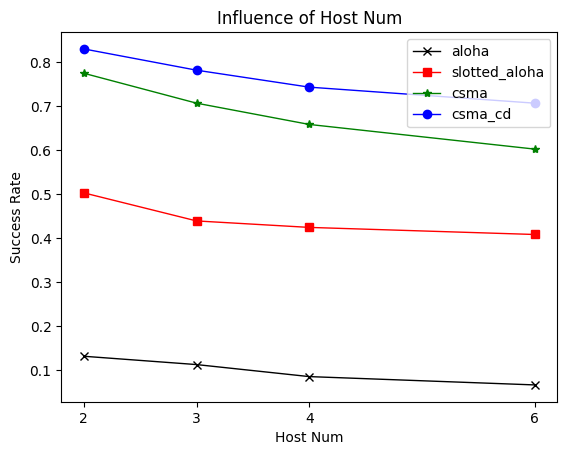

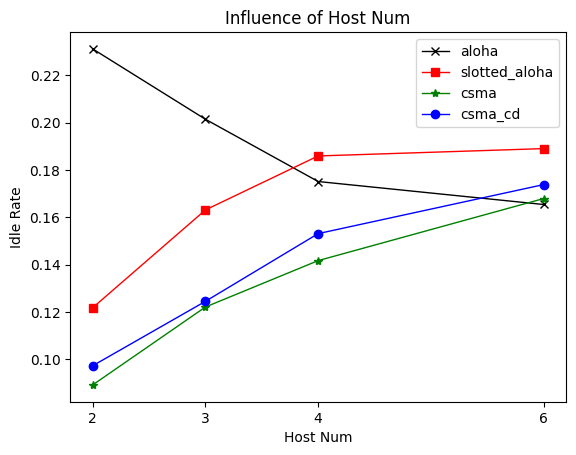

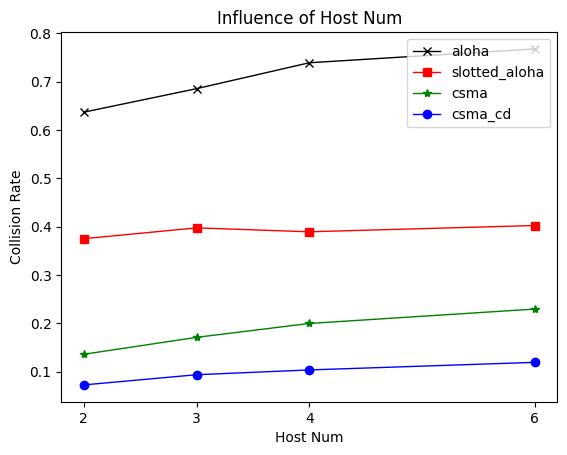

In [8]:
host_num_list = [2,3,4,6]
packet_num_list = [1200,800,600,400]
Q3_settings = [Q2_Setting(host_num=h, packet_num=p, coefficient=1) for h,p in zip(host_num_list, packet_num_list)]
Q3 = Test()
Q3.test(Q3_settings)
Q3.plot("Influence of Host Num", "Host Num", host_num_list)

### 4.

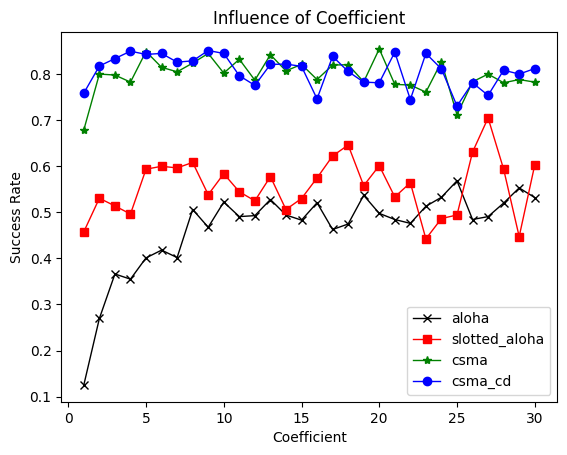

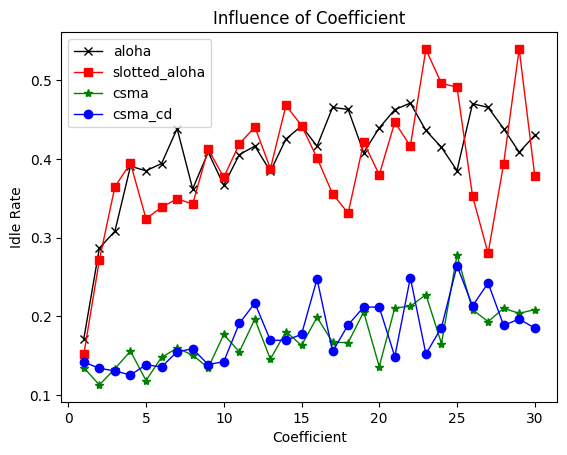

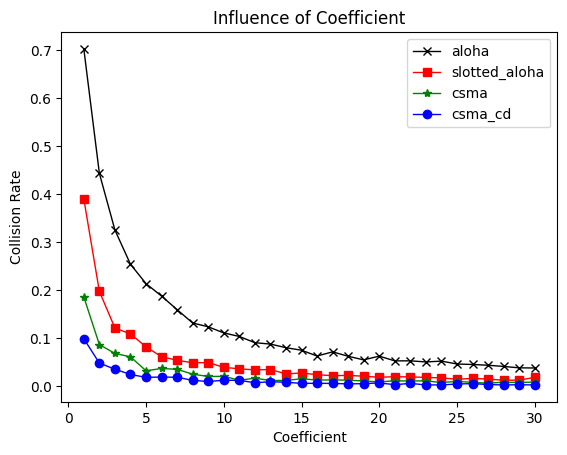

In [9]:
c = [i for i in range(1, 31, 1)]
tc = [i for i in range(0, 31, 5)]
Q4_settings = [Q2_Setting(coefficient=c) for c in range(1, 31, 1)]
Q4 = Test()
Q4.test(Q4_settings)
Q4.plot("Influence of Coefficient", "Coefficient", c, tc)

### 5.

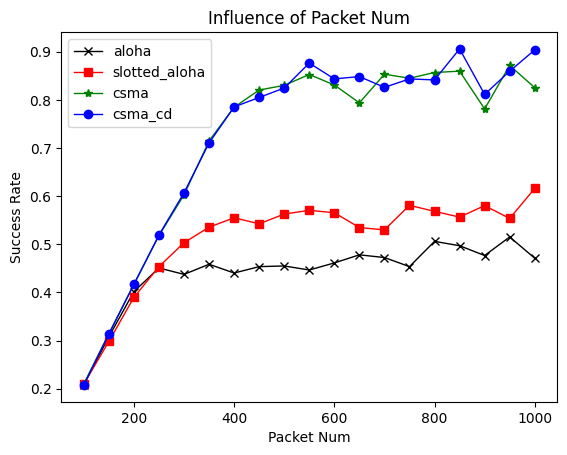

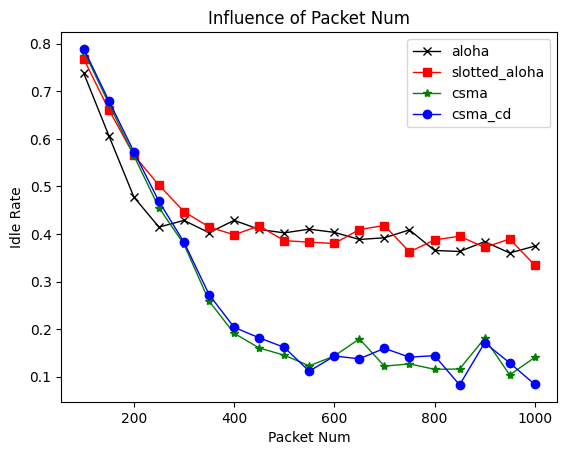

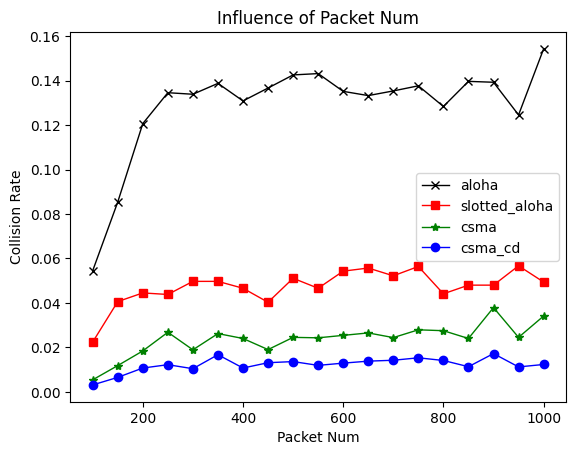

In [10]:
p = [i for i in range(100, 1050, 50)]
tp = [i for i in range(200, 1001, 200)]
Q5_settings = [Q2_Setting(packet_num=p) for p in range(100, 1050, 50)]
Q5 = Test()
Q5.test(Q5_settings)
Q5.plot("Influence of Packet Num", "Packet Num", p, tp)

### 6.

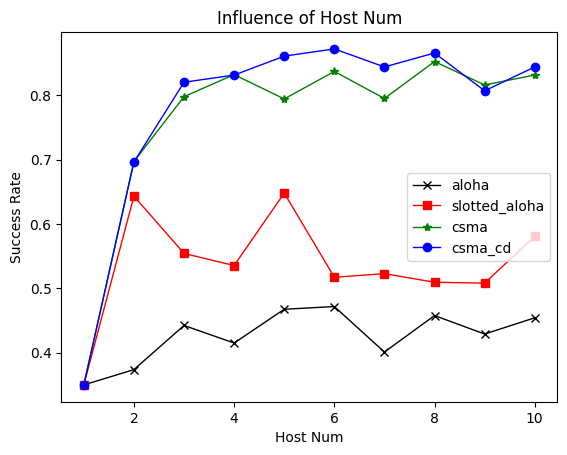

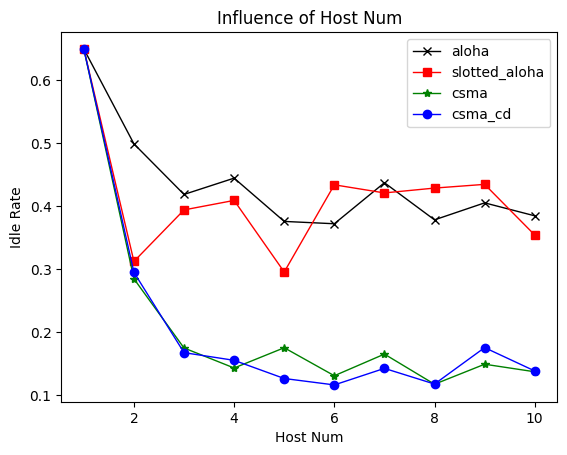

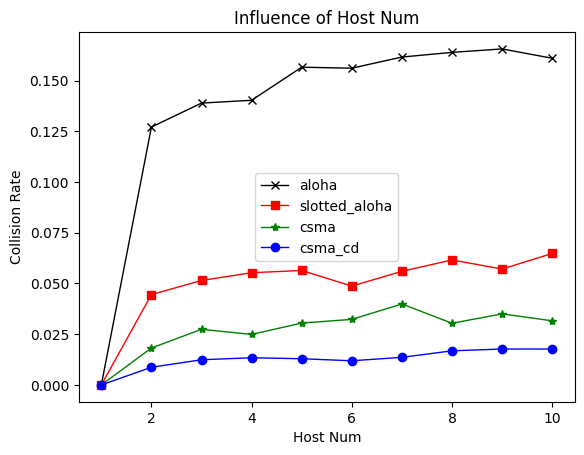

In [11]:
h = [i for i in range(1, 11, 1)]
th = [i for i in range(2, 11, 2)]
Q6_settings = [Q2_Setting(host_num=h) for h in range(1, 11, 1)]
Q6 = Test()
Q6.test(Q6_settings)
Q6.plot("Influence of Host Num", "Host Num", h, th)

### 7.

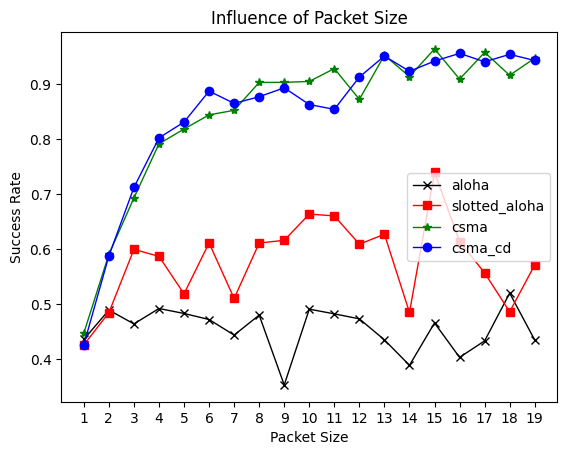

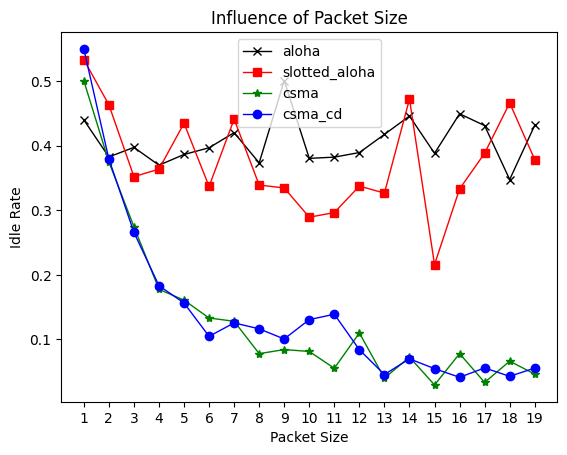

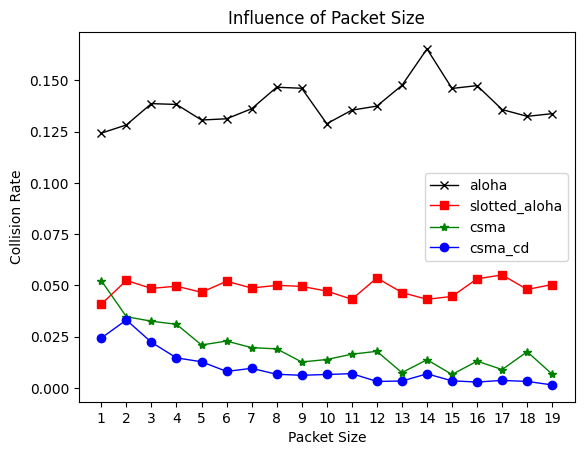

In [12]:
p = [i for i in range(1, 20, 1)]
tp = [i for i in range(1, 20, 1)]
Q7_settings = [Q2_Setting(packet_size=p) for p in range(1, 20, 1)]
Q7 = Test()
Q7.test(Q7_settings)
Q7.plot("Influence of Packet Size", "Packet Size", p, tp)

### 8.

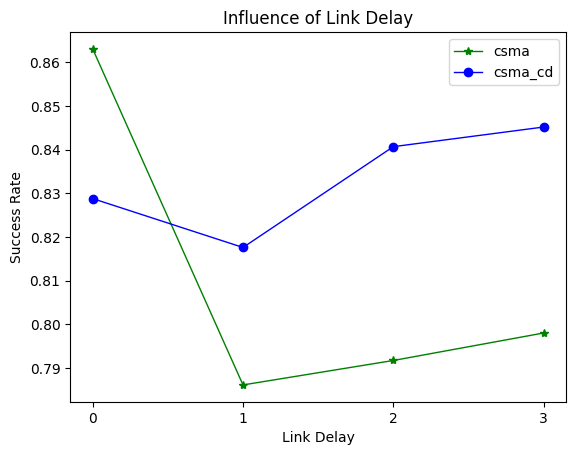

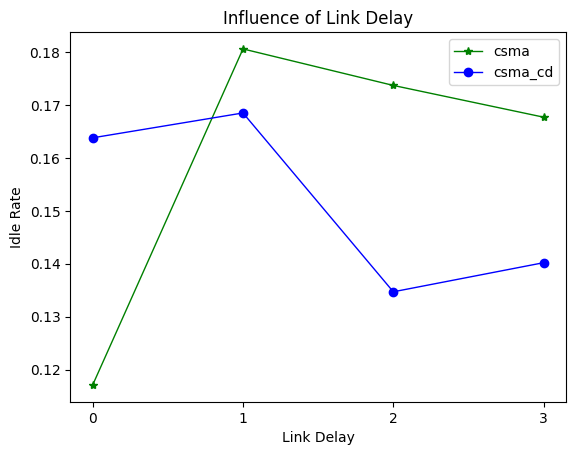

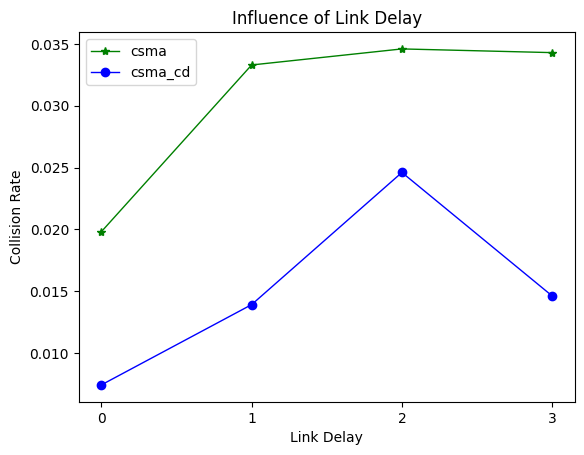

In [13]:
link_delay_list = [0,1,2,3]
packet_size_list = [7,5,3,1]
Q8_settings = [Q2_Setting(link_delay=l, packet_size=p) for l, p in zip(link_delay_list, packet_size_list)]
Q8 = Test()
Q8.test(Q8_settings)
Q8.plot("Influence of Link Delay", "Link Delay", link_delay_list, Q8=True)